#  8. 蒙特卡洛方法

## 生成随机数 ( pseudo random numbers )

### Random number generators in `numpy.random`

- [Mersenne Twister pseudo-random number generator 梅森旋转算法](https://zh.wikipedia.org/wiki/%E6%A2%85%E6%A3%AE%E6%97%8B%E8%BD%AC%E7%AE%97%E6%B3%95)


- Seed: Can be any integer between $0$ and $2^{32} - 1$

### statistical tools and probabilistic descriptions of random processes in `scipy.stats`

### 参考资料
- [numpy.random](https://numpy.org/doc/1.16/reference/routines.random.html)
- [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)


### 导入必要的 Python 库

In [2]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline

### 均匀分布的随机数

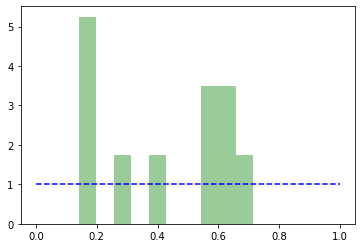

In [45]:
#np.random.seed(345678) 种子，生成一样的序列。
random_number = np.random.uniform(size=10)
plt.hist(random_number,10, facecolor='green',alpha=0.4,density=True);
bin = np.linspace(0,1,10)
pdf = stats.uniform.pdf(bin)
plt.plot(bin,pdf,'b--');

In [14]:
random_number = np.random.uniform()
random_number 

0.543354954149176

### 正态分布的随机数

0.13463429327862472
0.09899995686339824


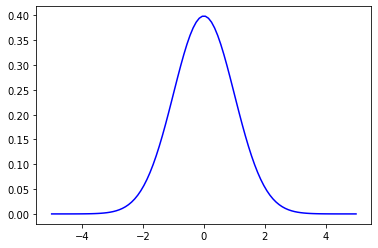

In [4]:
#random_number = np.random.randn(500)
bin = np.linspace(-5,5,100)
pdf = stats.norm.pdf(bin)
plt.plot(bin,pdf,'b-')
print(np.std(pdf))
print(np.mean(pdf))

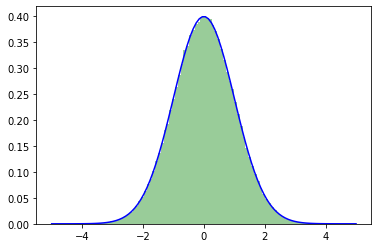

In [9]:
random_number = np.random.normal(size=500000)
plt.hist(random_number,100, facecolor='green',alpha=0.4,density=True);
plt.plot(bin,pdf,'b-')

## 第一个例子：模拟抛硬币

## 第二个例子：[Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem)

蒙提霍尔问题，亦称为蒙特霍问题或三门问题（英文：Monty Hall Problem），是一个源自博弈论的数学游戏问题，大致出自美国的电视游戏节目“Let's Make a Deal”。问题的名字来自该节目的主持人蒙提·霍尔（Monty Hall）。

这个游戏的玩法是：参赛者会看见三扇关闭了的门，其中一扇的后面有一辆汽车，选中后面有车的那扇门就可以赢得该汽车，而另外两扇门后面则各藏有一只山羊。当参赛者选定了一扇门，但未去开启它的时候，节目主持人会开启剩下两扇门的其中一扇，露出其中一只山羊。主持人其后会问参赛者要不要换另一扇仍然关上的门。问题是：换另一扇门是否会增加参赛者赢得汽车的机率？

这个问题亦被叫做蒙提霍尔悖论：虽然该问题的答案在逻辑上并不自相矛盾，但十分违反直觉。这问题曾引起一阵热烈的讨论。

## 第三个例子：求圆的面积

### 如何求一个圆的面积？
$s = \pi r^2 $

s =  0.7853981633974483


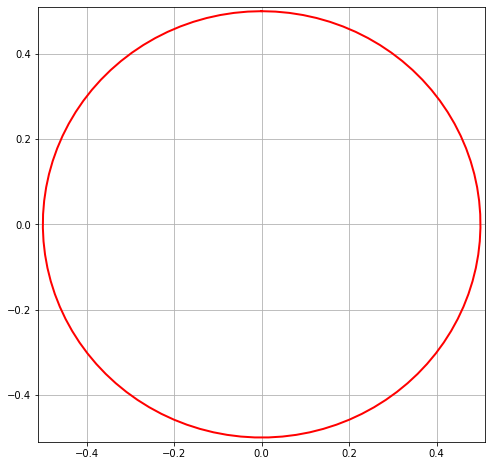

In [48]:
t = np.linspace(0,2*np.pi,100)
X = np.sin(t)*0.5
Y = np.cos(t)*0.5
plt.figure(figsize=(8, 8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw = 2);
s = np.pi*0.5*0.5
print("s = ",s)

### 蒙卡方法1：均匀采样

蒙卡结果： 0.7792 
 理论结果： 0.7853981633974483


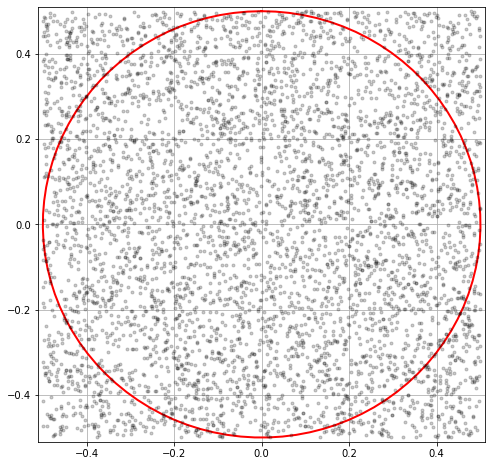

In [3]:
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)
N=5000
np.random.seed()
X_random=np.random.uniform(-0.5,0.5,N)
Y_random=np.random.uniform(-0.5,0.5,N)
plt.plot(X_random, Y_random,'k.',alpha=0.2)

N_hit=0
for i in np.arange(N):
    if np.sqrt((X_random[i]*X_random[i]+Y_random[i]*Y_random[i]))<0.5:
        N_hit=N_hit+1
print("蒙卡结果：",N_hit/N,"\n","理论结果：",np.pi*0.5*0.5)

蒙卡结果： 0.785372 
 理论结果： 0.7853981633974483
Wall time: 2.39 s


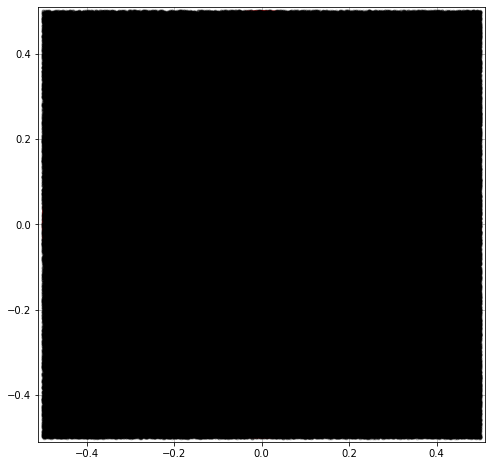

In [13]:
%%time
import time
for i in range(10):
    time.sleep(0.1)
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)
N=500000
np.random.seed()
X_random=np.random.uniform(-0.5,0.5,N)
Y_random=np.random.uniform(-0.5,0.5,N)
plt.plot(X_random, Y_random,'k.',alpha=0.2)

N_hit=0
for i in np.arange(N):
    if np.sqrt((X_random[i]*X_random[i]+Y_random[i]*Y_random[i]))<0.5:
        N_hit=N_hit+1
print("蒙卡结果：",N_hit/N,"\n","理论结果：",np.pi*0.5*0.5)

蒙卡结果： 0.78652 
理论结果： 0.7853981633974483
Wall time: 3.57 s


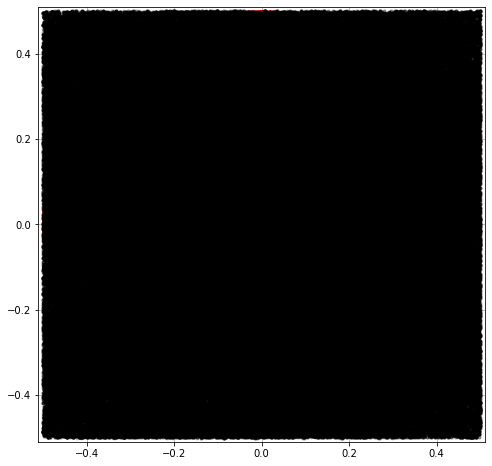

In [14]:
%%time
import time
for i in range(10):
    time.sleep(0.1)
x,y=0,0

delta=0.2 #最大步幅
n_trials=500000
Pos=np.zeros((n_trials,2))
n_hits=0
for i in np.arange(n_trials):
    del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
    if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
        x,y=x+del_x,y+del_y
    if x**2+y**2<0.5*0.5:
        n_hits+=1
    Pos[i,0]=x
    Pos[i,1]=y
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)

plt.plot(Pos[:,0],Pos[:,1],"k.",alpha=0.2)
print("蒙卡结果：",n_hits/n_trials,"\n理论结果：",np.pi*0.5*0.5)


### 结果与总点数的关系

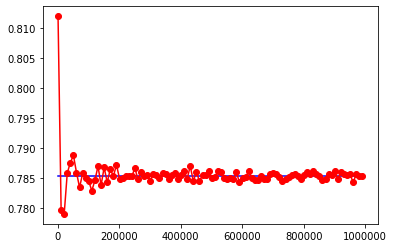

In [6]:
N=np.arange(1000,1000000,10000)
N_hit=np.empty(len(N))
for i in np.arange(len(N)):
    X_random=np.random.uniform(-0.5,0.5,N[i])
    Y_random=np.random.uniform(-0.5,0.5,N[i])
    N_h=0
    for ii in np.arange(N[i]):
        if np.sqrt((X_random[ii]*X_random[ii]+Y_random[ii]*Y_random[ii]))<0.5:
            N_h=N_h+1
        N_hit[i]=N_h/N[i]
plt.plot(N,np.ones(len(N))*np.pi*0.5*0.5,"b-")
plt.plot(N,N_hit,"ro-")
        

### 计算精度与采样数的定量关系

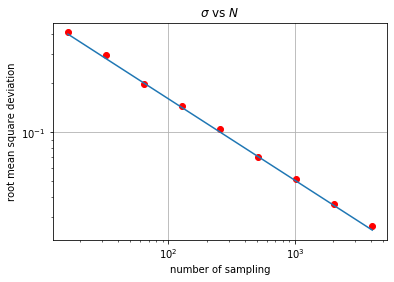

In [23]:
def Circle_area(N,b):
    N_h=0
    X_random=np.random.uniform(-b,b,N)
    Y_random=np.random.uniform(-b,b,N)
    for i in np.arange(N):
        if np.sqrt((X_random[i]*X_random[i]+Y_random[i]*Y_random[i]))<b:
            N_h=N_h+1
    return 4*b*b*N_h/N

b=1
s=np.pi*b*b
n_runs=500
power2_list=np.arange(4,13)
i_list=np.arange(len(power2_list))
n_trials_list=np.empty(len(power2_list))
sigmasqs=np.empty(len(power2_list))
ss=np.empty(len(power2_list))

for i in i_list:
    n_trials=2**power2_list[i]
    sigmasq=0.0
    ssq=0.0
    for run in np.arange(n_runs):
        ms=Circle_area(n_trials,b)
        sigmasq+=(ms-s)**2
        ssq=ms**2
    sigmasqs[i]=np.sqrt(sigmasq/(n_runs))
    ss[i]=ssq/(n_runs)
    n_trials_list[i]=n_trials

plt.loglog(n_trials_list,sigmasqs,"ro") #作点
plt.xlabel("number of sampling")
plt.ylabel("root mean square deviation")
plt.title("$\sigma$ vs $N$")
plt.loglog(n_trials_list,0.4*4/np.sqrt(n_trials_list)) #拟合直线
plt.grid(True)
    

In [20]:
#power2_list=np.arange(9)
#power2_list
#len(power2_list)
#sigmasqs=np.empty(len(power2_list))
#sigmasqs=0.0
#sigmasqs
#n_trials_list=np.empty(len(power2_list))
#n_trials_list


### 蒙卡方法2：Markov chain Monte Carlo algorithms

In [9]:
# Makov Chain sampling
x,y=0,0

delta=0.2 #最大步幅
n_trials=5000
Pos=np.zeros((n_trials,2))
n_hits=0
for i in np.arange(n_trials):
    del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
    if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
        x,y=x+del_x,y+del_y
    if x**2+y**2<0.5*0.5:
        n_hits+=1
    Pos[i,0]=x
    Pos[i,1]=y

蒙卡结果： 0.7958 
理论结果： 0.7853981633974483


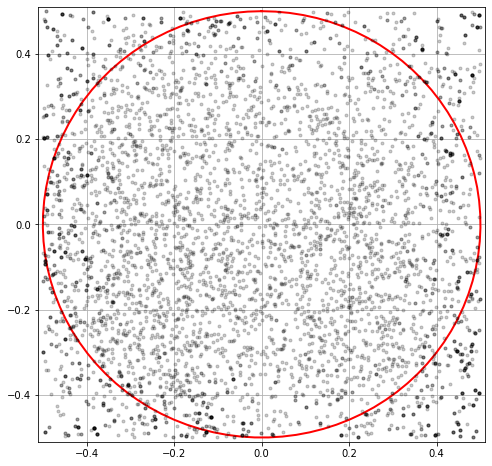

In [10]:
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)

plt.plot(Pos[:,0],Pos[:,1],"k.",alpha=0.2)
print("蒙卡结果：",n_hits/n_trials,"\n理论结果：",np.pi*0.5*0.5)


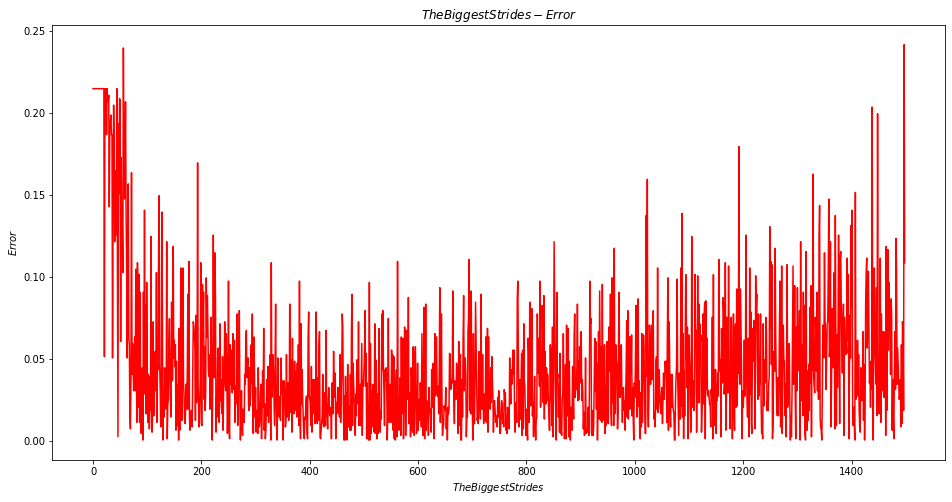

In [12]:

import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
bestcircle=[]
plt.figure(figsize=(16, 8))
for k in range(1,1500,1):
    delta=k*0.001
    x,y=0,0
    n_trials=500
    n_hits=0
    for i in np.arange(n_trials):
        del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
        if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
            x,y=x+del_x,y+del_y
        if x**2+y**2<0.5*0.5:
            n_hits+=1
    bestcircle.append(np.abs((n_hits/n_trials)-np.pi*0.5*0.5))
plt.xlabel("$The Biggest Strides$")
plt.ylabel("$Error$")
plt.title("$The Biggest Strides-Error$")
plt.plot(bestcircle,'r')



    

In [24]:
#这里也不是作业内容
print((bestcircle.index(a)))
bestcircle
a

226


0.000601836602551753

In [13]:
x=np.arange(1001)
x

array([   0,    1,    2, ...,  998,  999, 1000])